In [1]:
#imports
import pandas as pd
import os
from dotenv import load_dotenv
from utils.helpers import *

# Load environment variables
load_dotenv()

# Read CSV file
df = pd.read_csv(os.environ['TRAIN_LOCATION'])
# df = df.drop(columns=['id'])

# View result
print(df.info())
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
42219,42219,Ansh,Male,41.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,2.0,5-6 hours,Healthy,MBA,No,12.0,1.0,No,0
93635,93635,Ansh,Male,21.0,Kanpur,Working Professional,Chemist,NaN,3.0,NaN,NaN,4.0,Less than 5 hours,Healthy,M.Pharm,Yes,4.0,2.0,No,0
115096,115096,Krishna,Male,41.0,Nashik,Working Professional,Travel Consultant,NaN,5.0,NaN,NaN,5.0,5-6 hours,Healthy,BHM,No,4.0,4.0,No,0
133242,133242,Janvi,Female,38.0,Varanasi,Working Professional,Chemist,NaN,1.0,NaN,NaN,1.0,7-8 hours,Unhealthy,MBBS,Yes,8.0,2.0,No,0
92716,92716,Tanya,Female,28.0,Thane,Student,NaN,2.0,NaN,5.08,5.0,NaN,Less than 5 hours,Unhealthy,BCA,No,0.0,1.0,No,0


In [2]:
#Check for missing and duplicates
print(df.duplicated().sum()) # no duplicates
df.isna().sum() #We have alot of missing data that we will deal with in different ways

0


id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                                    0
dtype: int64

In [3]:
from utils.helpers import preprocessing
df = preprocessing(df)
df

,gender,age,city,working_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,suicidal_thoughts,workstudy_hours,financial_stress,family_mental_illness,depression
0,0,0.695360,-0.060856,0.497344,-1.530845,-0.045698,1.589714,0.033784,0.018013,-0.772518,1.344780,1.256906,-0.623353,-0.988861,-1.363057,-0.699617,-0.994217,0
1,1,-1.161867,1.360107,0.497344,0.885525,-0.045698,0.795176,0.033784,0.018013,0.016183,-1.266667,-1.230634,0.486299,1.011265,0.193928,0.007793,-0.994217,1
2,1,-0.596624,1.495437,-2.010679,0.831828,3.194278,0.000638,1.869755,-1.632006,0.016183,-0.483233,1.256906,-1.067214,1.011265,-0.844062,-1.407027,-0.994217,1
3,1,-1.484863,0.412799,0.497344,0.885525,-0.045698,1.589714,0.033784,0.018013,-1.561219,-1.266667,0.013136,-0.808295,1.011265,0.972421,-1.407027,1.005816,1
4,0,-0.838871,-0.500678,0.497344,-1.584542,-0.045698,-1.588437,0.033784,0.018013,-1.561219,-0.483233,-1.230634,-0.808295,1.011265,0.712923,0.715203,1.005816,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140695,0,-1.807859,-1.617149,0.497344,1.046616,-0.045698,1.589714,0.033784,0.018013,0.804884,-0.483233,-1.230634,-0.179492,-0.988861,-1.103560,0.715203,1.005816,1
140696,0,0.049368,-0.872835,0.497344,-1.262359,-0.045698,1.589714,0.033784,0.018013,0.804884,0.561346,0.013136,-0.956249,1.011265,-0.065570,1.422613,1.005816,0
140697,0,-1.323365,-0.263850,0.497344,-0.027326,-0.045698,0.000638,0.033784,0.018013,-1.561219,1.344780,0.013136,-1.141191,-0.988861,-0.584565,0.715203,-0.994217,0
140698,0,0.695360,1.055615,0.497344,0.455948,-0.045698,1.589714,0.033784,0.018013,-0.772518,-0.483233,0.013136,1.263056,1.011265,0.972421,-1.407027,-0.994217,0


In [4]:
# #Now we want to split it into 2 datasets, students and workers
# students_df = df.loc[df["working_student"] == 0].drop({"working_student", "work_pressure", "job_satisfaction"}, axis=1)
# working_df = df.loc[df["working_student"] == 1].drop({"working_student", "study_satisfaction", "cgpa", "academic_pressure"}, axis=1)

# display(students_df)

In [5]:
# from OurModels import LogisticRegressionModel
# model = LogisticRegressionModel()
# results = model.train(df)
# model.report()

In [6]:
# newdf = pd.read_csv(os.environ["TEST_LOCATION"])
# newdf = preprocessing(newdf)

# test = model.predict(newdf)

# generate_submission(test, "logreg")
# print(test.shape)

In [7]:
# from OurModels import DecisionTreeClassifierModel
# model = DecisionTreeClassifierModel()
# results = model.train(df)
# # model.optimize(df)
# model.report()

In [8]:
# newdf = pd.read_csv(os.environ['TEST_LOCATION'])
# newdf = preprocessing(newdf)

# test = model.predict(newdf)

# generate_submission(test, "treeeeee")
# print(test.shape)

In [9]:
# print(test.shape)

In [10]:
# from OurModels import XGBoostModel
# model = XGBoostModel()
# results = model.train(df)
# model.report(*results)
# newdf = preprocessing(pd.read_csv(os.environ['TEST_LOCATION']))

# test = model.predict(newdf)

# generate_submission(test, "XBG")

In [11]:
from OurModels import NeuralNetwork
# Initialize and train
clf2 = NeuralNetwork()
X_train, X_test, y_train, y_test = clf2.prepare_data(df)
# clf2.build_model()
# clf2.train(
#     X_train,
#     y_train,
#     epochs=1
# )
clf2.load_our_model()
clf2.save()
results = clf2.evaluate(X_test, y_test)
print(results)

2025-11-22 20:18:37.976594: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-11-22 20:18:37.976656: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-11-22 20:18:37.976665: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.66 GB
2025-11-22 20:18:37.976692: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-22 20:18:37.976708: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model loaded from /Users/nikan/Desktop/School/Sems/Fall 2025/COS 322/COS322-depression/data/Results/Images/model.keras
model saved to  /Users/nikan/Desktop/School/Sems/Fall 2025/COS 322/COS322-depression/data/Results/Images/model.keras


2025-11-22 20:18:38.399619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


{'loss': 0.22573497891426086, 'accuracy': 0.9338308572769165}


880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


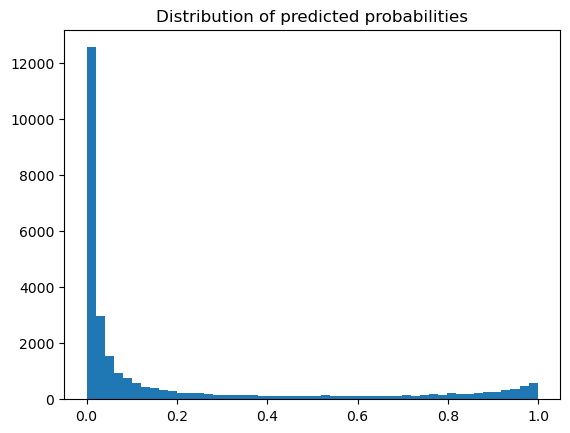

In [12]:
import matplotlib.pyplot as plt
y_probs = clf2.model.predict(X_test)
y_probs = np.array(y_probs, dtype=float)
# convert (N,) → (N,1)
if y_probs.ndim == 1:
    y_probs = y_probs[:, None]

# get score for positive class
if y_probs.shape[1] == 2:
    y_scores = y_probs[:, 1]
else:
    y_scores = y_probs[:, 0]


plt.hist(y_scores, bins=50)
plt.title("Distribution of predicted probabilities")
plt.show()

880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


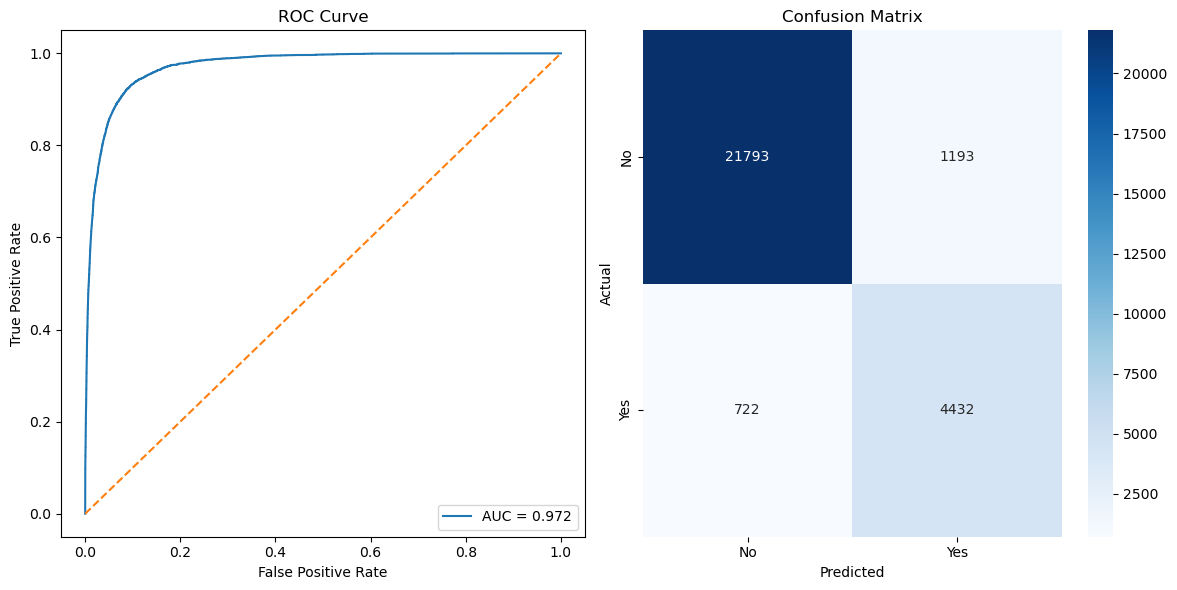

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     22986
           1       0.79      0.86      0.82      5154

    accuracy                           0.93     28140
   macro avg       0.88      0.90      0.89     28140
weighted avg       0.93      0.93      0.93     28140

Accuracy: 0.9319


In [21]:
# get raw probabilities
y_scores = clf2.model.predict(X_test).flatten()

# convert to probabilities of positive class if softmax
if y_scores.ndim > 1:
    y_scores = y_scores[:, 1]

# threshold
y_pred = (y_scores >= 0.4).astype(int)

clf2.report(y_pred, y_test, y_scores)

In [22]:
from sklearn.metrics import f1_score

y_scores = clf2.model.predict(X_test).flatten()
# Softmax case → get class 1 probabilities
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

thresholds = np.linspace(0, 1, 101)
best_t = 0.0
best_f1 = 0.0

for t in thresholds:
    y_pred = (y_scores >= t).astype(int)
    score = f1_score(y_test, y_pred)
    if score > best_f1:
        best_f1 = score
        best_t = t

print("Best Threshold (F1):", best_t)
print("Best F1 Score:", best_f1)

880/880 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Best Threshold (F1): 0.41000000000000003
Best F1 Score: 0.8237050863275781
